## Hadamard Walk Quantum Galton Box

In [3]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import HGate, RYGate, RXGate, XGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kstest, norm, expon, stats
from scipy.optimize import curve_fit
%matplotlib inline

## Changes to be made in generalized QGB algo
- All resets removed
- No CNOT between two pegs in a layer instead add a hadamard to the ancilla
- a reset and a final CNOT gate is needed at the end

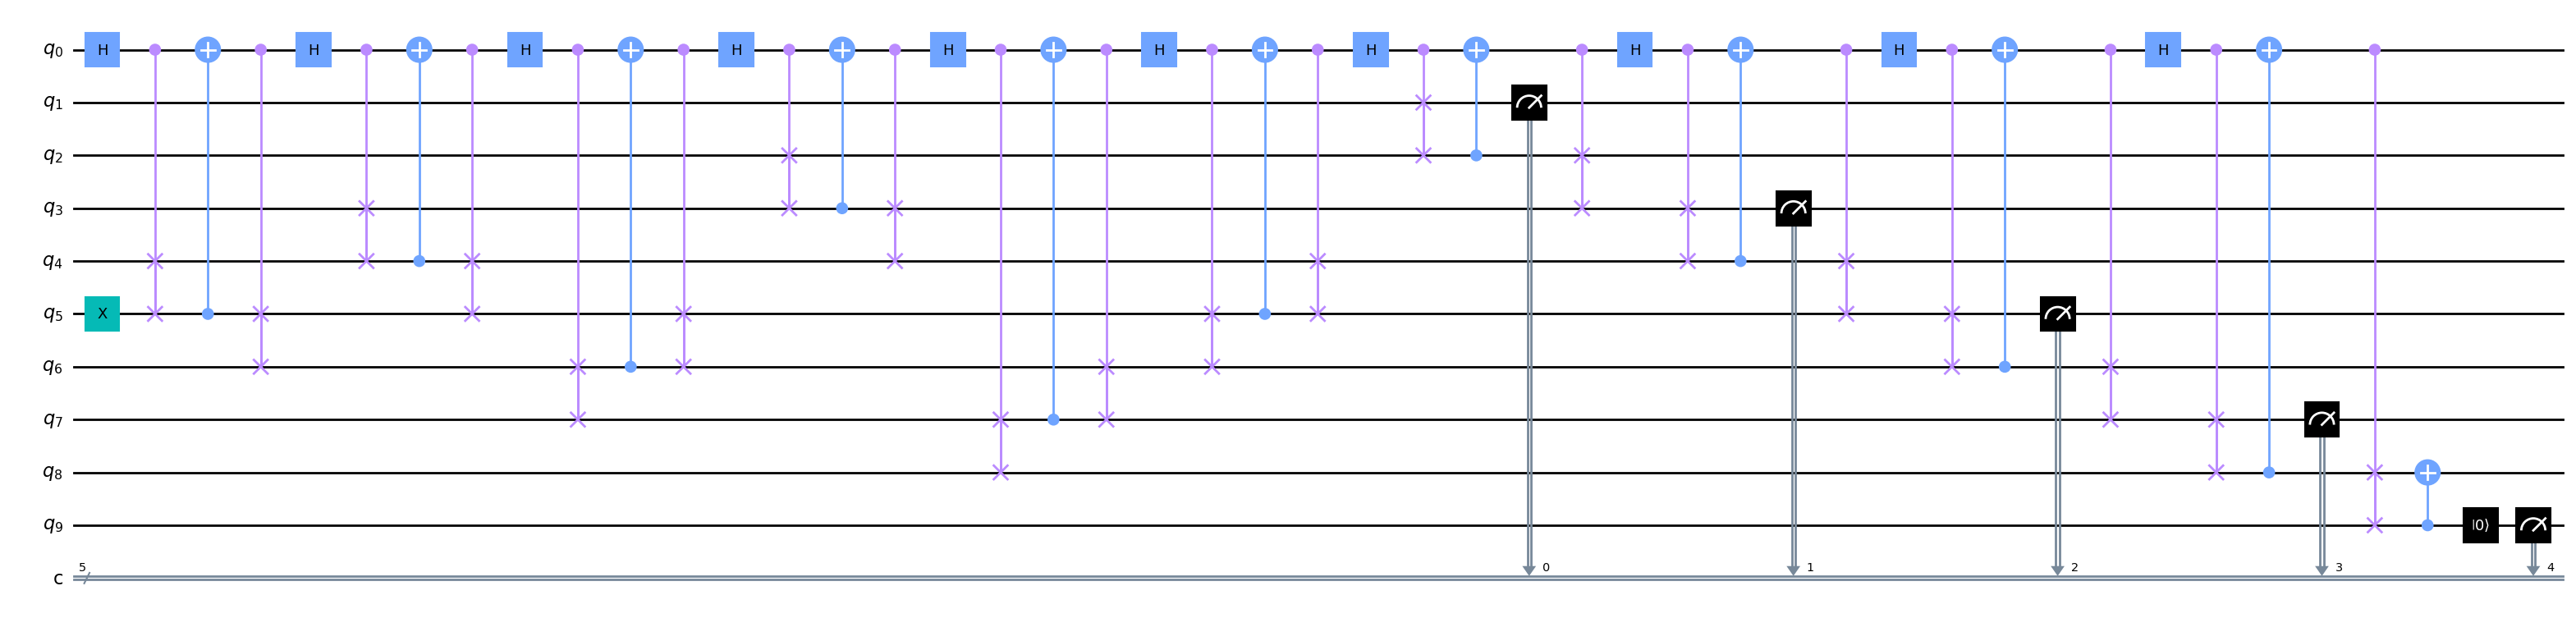

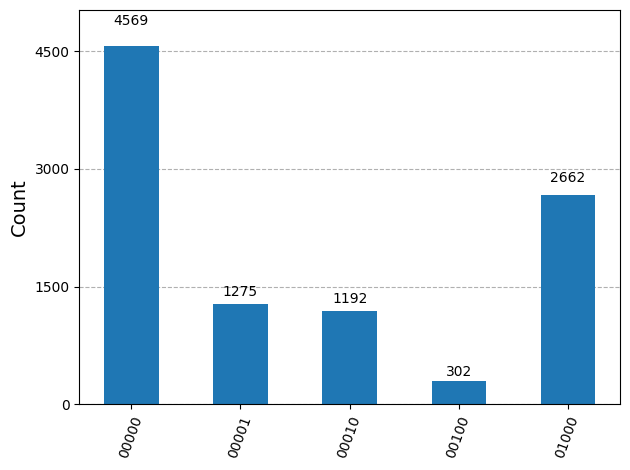

In [10]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, c)

# qc.reset(q[0])
qc.x(q[5])
qc.h(q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
# qc.cx(q[5], q[0])
# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[5], q[6])

# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[6], q[7])
# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0],q[5],q[6])
qc.cx(q[5],q[0])
qc.cswap(q[0],q[4],q[5])

# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
# qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])

qc.cx(q[9], q[8])
qc.reset(q[9])

for i in range(0, 5):
    qc.measure(q[2*i+1], c[i])

qc.draw(output='mpl', style='clifford', fold=-1)
plt.show()

backend = AerSimulator()
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

plot_histogram(counts)
plt.show()